In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


## Data Reading and Understanding

In [2]:
# For Displaying all columns
pd.set_option('display.max_columns', None)

In [3]:
# importing dataset

leads=pd.read_csv('leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis

#### Data Cleaning and Treatment

In [7]:
# cleaning the dataframe

In [8]:
# checking for duplicates
print(sum(leads.duplicated(subset = 'Prospect ID')) == 0)
print(sum(leads.duplicated(subset = 'Lead Number')) == 0)

True
True


as we can see there's no presence of duplicate values in Lead Number and Prospect ID, they are just indicative of ID number of the contracted people and can be dropped

In [9]:
# dropping Prospect ID
leads.drop(['Prospect ID'],axis=1,inplace = True)

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads = leads.replace('Select',np.nan)

In [11]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [13]:
# Dropping Unique valued columns
leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1, inplace= True)

In [14]:
#checking the percentage of missing values
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# dropping columns with more than 40% missing values
cols=leads.columns
for x in cols:
    if (leads[x].isnull().sum()/len(leads.index))*100 >= 40:
        leads.drop(x,axis=1,inplace=True)

In [16]:
leads.shape

(9240, 24)

In [17]:
#checking the percentage of missing values
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [18]:
# checking value count for country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
China                      2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
Philippines                2
Bangladesh                 2
Sri Lanka                  1
Denmark                    1
Kenya                      1
Malaysia                   1
Indonesia                  1
Switzerland   

In [19]:
leads['Country'].mode()

0    India
dtype: object

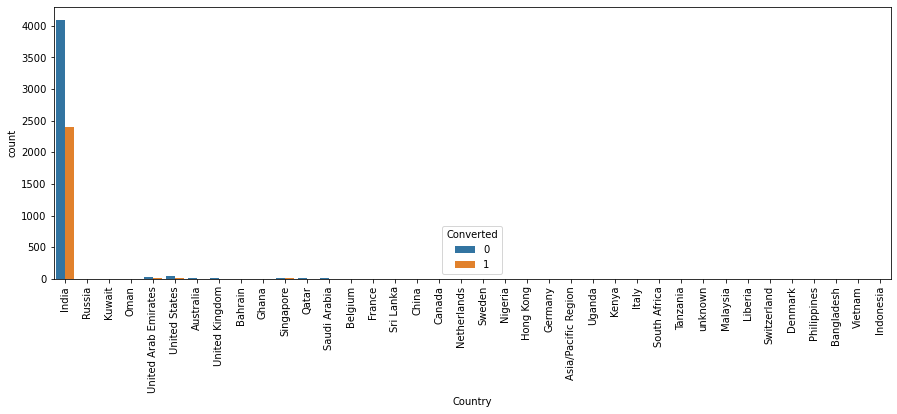

In [20]:
#plotting the country column 

plt.figure(figsize=(15,5))
sns.countplot(x=leads['Country'], hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [21]:
# as we can see India is the most commonly occuring amoung non-missing value thus we can impute all missing values with India
leads['Country']=leads['Country'].replace(np.nan,'India')

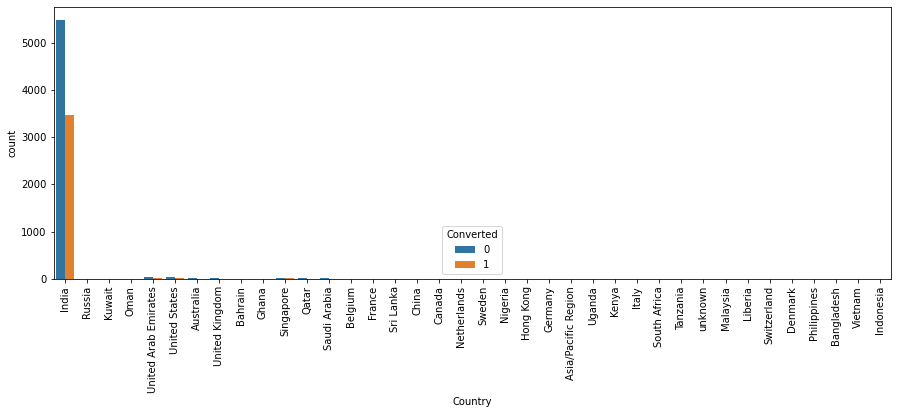

In [22]:
# again plotting country columns after replacing NaN values
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Country'], hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

inferences-
- From the above countplot we can infer that almost all of our leads are from India.

In [23]:
#As we can see the number of values for India is very high therefore this column can be dropped
leads.drop('Country',axis=1,inplace= True)

In [24]:
#checking value count for city column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

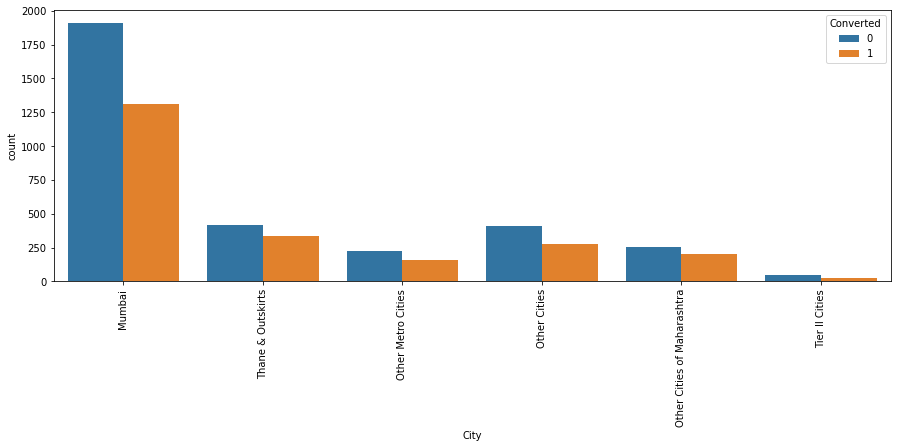

In [25]:
#plotting city column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['City'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [26]:
leads['City'].mode()

0    Mumbai
dtype: object

In [27]:
# as we can see Mumbai is the most commonly occuring amoung non-missing value thus we can impute all missing values with Mumbai
leads['City']=leads['City'].replace(np.nan,'Mumbai')

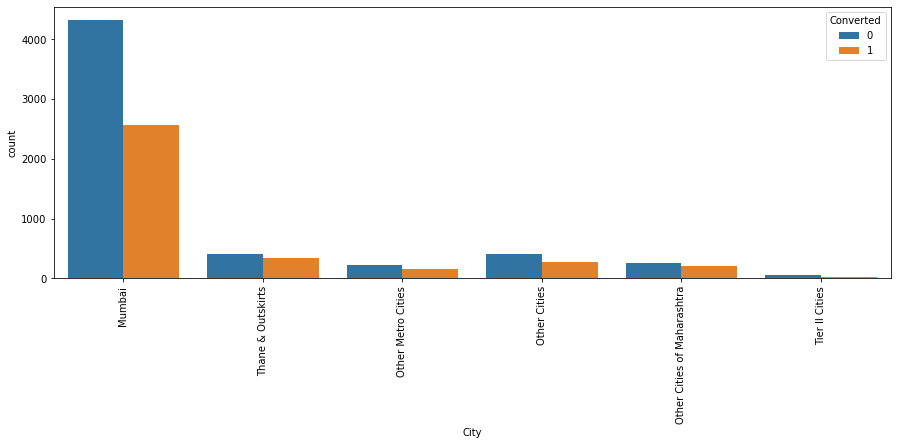

In [28]:
#plotting city column again
plt.figure(figsize=(15,5))
sns.countplot(x=leads['City'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

inferences-
- we can see that majority of our leads are from Mumbai and least number of leads are from Tier 2 cities

In [29]:
# checking value counts for specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
# lead may not have mentioned specialization cause they didn't have any or maybe they are student there could be 
# various reason like that therefore filling NaN values with 'Not Specified'
leads['Specialization']=leads['Specialization'].replace(np.nan,'Not Specified')

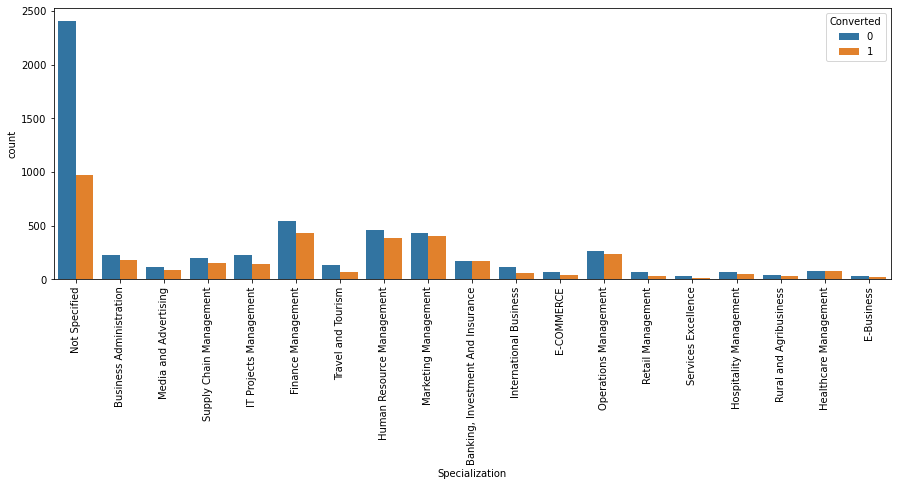

In [31]:
#plotting Specialization column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Specialization'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Combining Management Specialization because they show similar trends
leads['Specialization']=leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management Specializations')

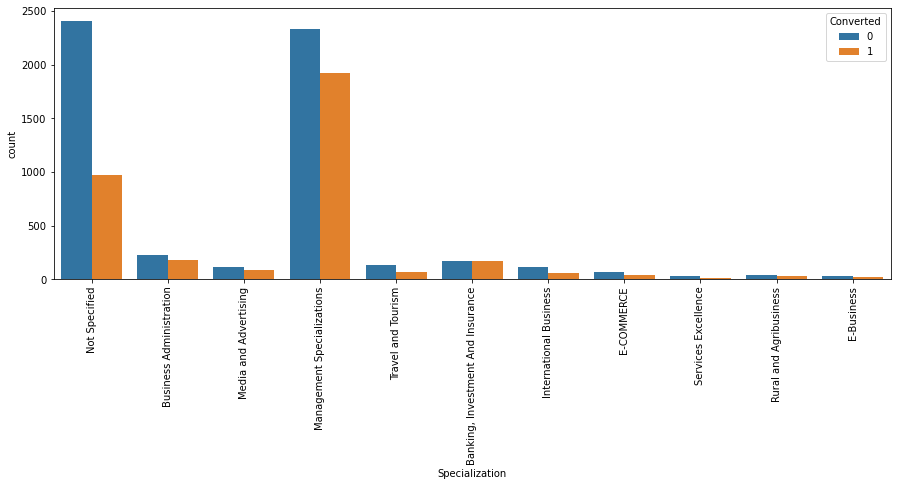

In [33]:
# again plotting Specialization column after conversion
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Specialization'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences-
- Majority of leads have Not Specified their specialization and from the pool of leads who have Not Specified their specialization the conversion rate is low as well. 
- high number of leads are from Management Specialization with high conversion rate.


In [34]:
# checking value counts for What is your current occupation column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
# computing mode of What is your current occupation column
leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [36]:
#replacing null values with Unemployed as Unemployed has the most occurance in the column
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [37]:
# checking count again
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
# checking value counts for 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
#computing mode for "What matters most to you in choosing a course" column
leads['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [40]:
# replacing nan values with "Better Career Prospects"
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [41]:
# again checking value counts for 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
# value for Better Career Prospects is very high in the column therefore this column can be dropped

leads.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [43]:
# Checking value counts for Tags column 
leads.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [44]:
# replacing nan values with not specified
leads['Tags']=leads['Tags'].replace(np.nan,'Not Specified')

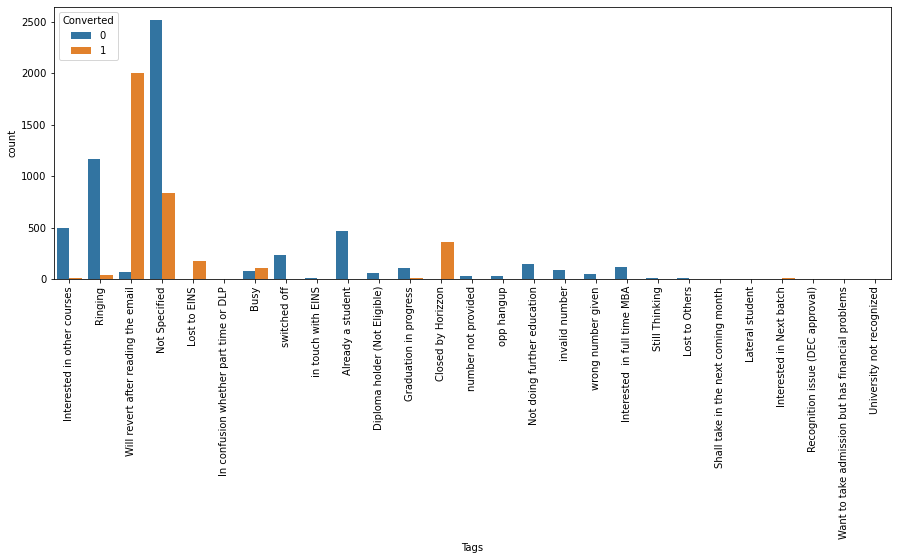

In [45]:
#plotting Tags column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Tags'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [46]:
# as we can see there are so many low frequency tags therefore changing low frequency tags into Other Tags
leads['Tags']=leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'],'Other Tags')

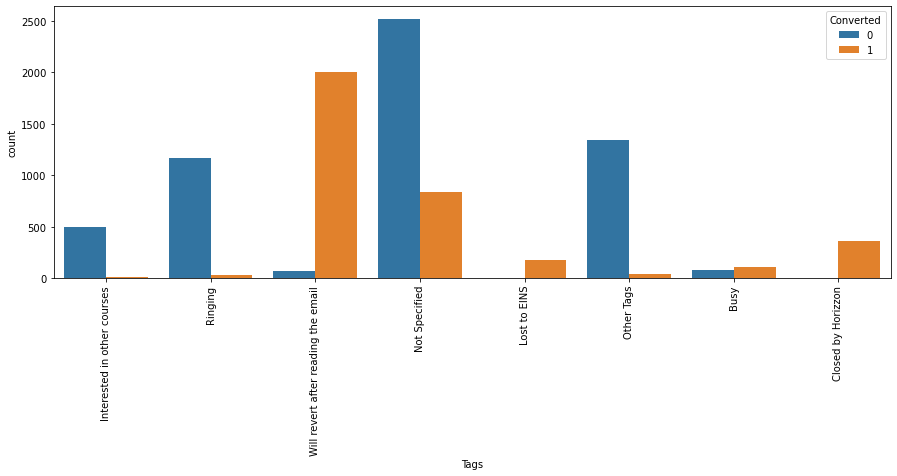

In [47]:
# again plotting Tags column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Tags'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

inference-
- Majority of leads converted into final customers are from the tag "Will revert after reading the email"

In [48]:
#checking the percentage of missing values
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable 

In [49]:
# Checking value counts for Lead Source column 
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
testone                 1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [50]:
# here replacing google to Google
leads['Lead Source']=leads['Lead Source'].replace('google','Google')
# here replacing nan to Others
leads['Lead Source']=leads['Lead Source'].replace(np.nan,'Others')
# replacing youtubechannel and facebook to social media
leads['Lead Source']=leads['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media')
# replacing all low frequency tags to others
leads['Lead Source']=leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','testone','blog','NC_EDM','WeLearn','Pay per Click Ads','welearnblog_Home'],'Social Media')

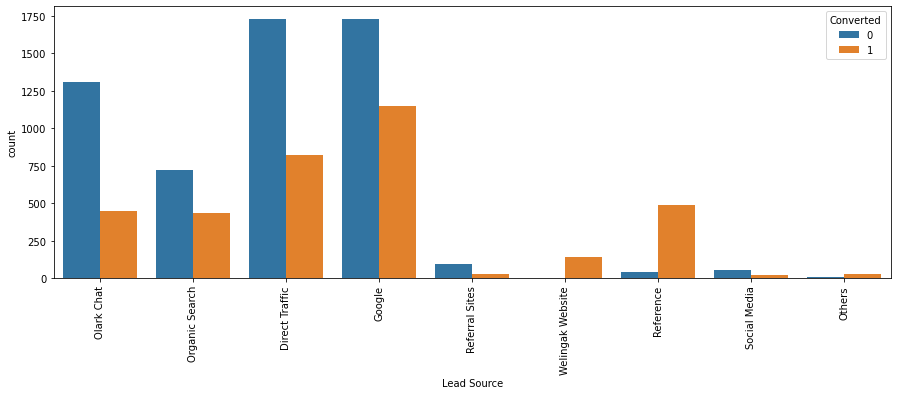

In [51]:
# again plotting Lead Source column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Lead Source'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

- as we can see majority of leads were generated through Direct Traffic and google 
- where as maximum number of leads converted into final customer were from Google

In [52]:
# For TotalVisits column 
# we need to convert it into integer as visits can not be in decimal and also handle the nan values(using median for that) 

leads['TotalVisits']=leads['TotalVisits'].replace(np.nan,leads['TotalVisits'].median())
leads['TotalVisits']=leads['TotalVisits'].astype(int)

In [53]:
# Page Views Per Visit
# handeling missing values (using median)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [54]:
# last acitvity 
# checking for unique values for last activity 
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
# replacing nan values with others 
leads['Last Activity'].fillna('Others',inplace=True)
# replacing low frequency variables into Others
leads["Last Activity"]=leads["Last Activity"].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed','Had a Phone Conversation'])

In [56]:
# checking the percentage of null values
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [57]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Email Opened,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [58]:
# checking values for "Do not Email" and "Do not call" columns
print(leads['Do Not Email'].value_counts(dropna=False))
print(leads['Do Not Call'].value_counts(dropna=False))

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [59]:
# we can drop "Do Not Call" Column as it is highly imbalanced
leads.drop('Do Not Call', axis=1 ,inplace = True)

In [60]:
# checking for imbalanced columns that we can drop
print(leads['Search'].value_counts(dropna=False))
print(leads['Newspaper Article'].value_counts(dropna=False))
print(leads['X Education Forums'].value_counts(dropna=False))
print(leads['Newspaper'].value_counts(dropna=False))
print(leads['Digital Advertisement'].value_counts(dropna=False))
print(leads['Through Recommendations'].value_counts(dropna=False))
print(leads['A free copy of Mastering The Interview'].value_counts(dropna=False))

No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [61]:
# dropping the highlt imbalanced columns
leads.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [62]:
# checking the dataframe
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Email Opened,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [63]:
# Last Notable Activity 
# checking value counts
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

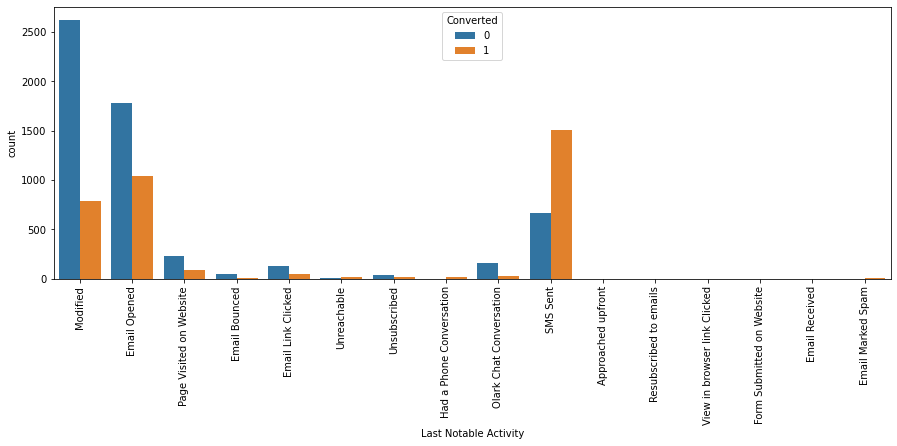

In [64]:
#plotting the column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Last Notable Activity'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()


In [65]:
# grouping the low frequecy values into Others
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other Notable Activity')

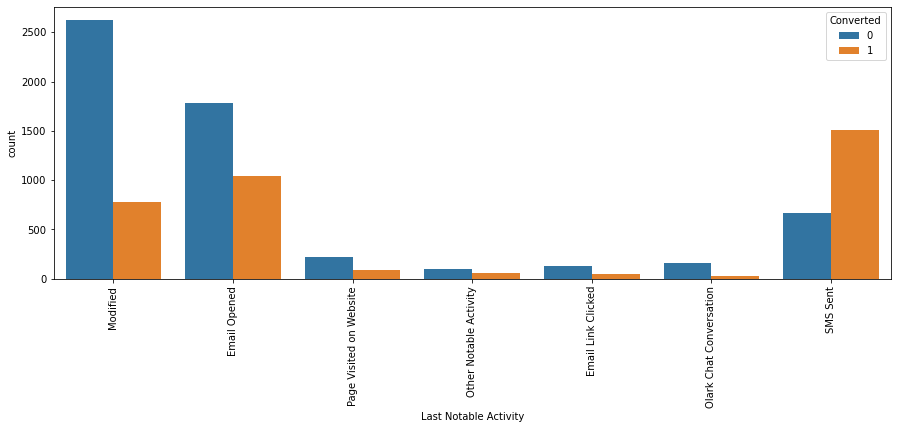

In [66]:
#again plotting the Last Notable Activity column
plt.figure(figsize=(15,5))
sns.countplot(x=leads['Last Notable Activity'],hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

inferences-
- Highest number of leads belong to Modified 'Last Notable Acitivity' but the conversion rate is low.
- on the other hand leads belonging to SMS sent "Last Notable Acitivity" has the highest number of conversion rate(highest number of leads converted into final customer)

In [67]:
# checking the % of data that has converted value = 1 
(leads.Converted.sum()/len(leads.Converted.index))*100

38.53896103896104

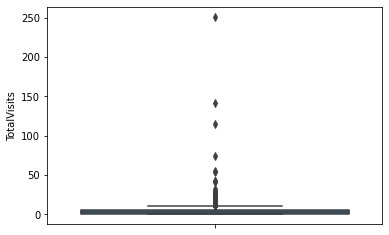

In [68]:
# checking for outliers in numerical data 

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [69]:
# we can clearly see the presence of outliers in TotalVisits column
# now checking the percentile value for column TotalVisits
leads['TotalVisits'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

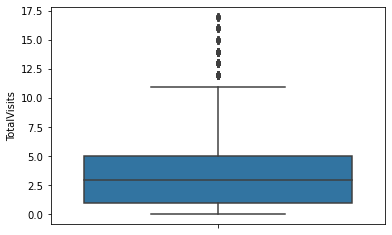

In [70]:
# from the above percentiles we can clearly see the exponential increase in the value between 99th percentile and max 
# Performing outliers treatment removing top and bottom 1% of the column
q3=leads['TotalVisits'].quantile(.99)
q1=leads['TotalVisits'].quantile(.01)
leads=leads[leads['TotalVisits']<=q3]
leads=leads[leads['TotalVisits']>=q1]
sns.boxplot(y=leads.TotalVisits)
plt.show()

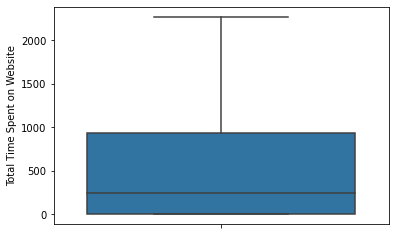

In [71]:
# checking for outliers in 'Total Time Spent on Website' column

sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

There's no presence of outliers in the column 'Total Time Spent on Website'

In [72]:
#checking the description of the column 
leads['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

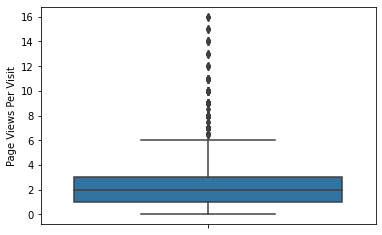

In [73]:
# as we can see from the above describe that there is an exponential increase in value between 99% and max 
# therefore plotting a boxplot 
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

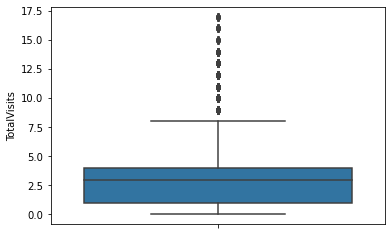

In [74]:
# from the above box plot we can clearly see the presence of outliers 
# Performing outliers treatment removing top and bottom 1% of the column
q3=leads['Page Views Per Visit'].quantile(.99)
q1=leads['Page Views Per Visit'].quantile(.01)
leads=leads[leads['Page Views Per Visit']<=q3]
leads=leads[leads['Page Views Per Visit']>=q1]
sns.boxplot(y=leads.TotalVisits)
plt.show()

In [75]:
leads.shape

(9090, 15)

In [76]:
# checking the percentage of rows retained in data cleaning process
# is given by -> (Number of rows left after cleaning/Number of rows before cleaning)*100 
(9090/9240)*100

98.37662337662337

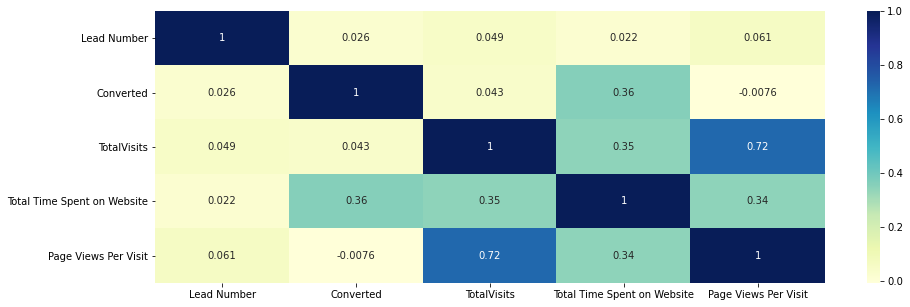

In [77]:
# Correlation
# visualizing correlation by heatmap
plt.figure(figsize=(15,5))
sns.heatmap(leads.corr(),annot=True,cmap="YlGnBu")
plt.show()

inferences-
- there's some correlation between the variable "TotalVisits" and "Page Views Per Visit"

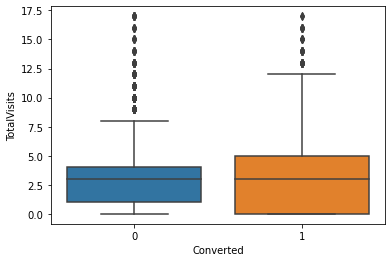

In [78]:
# for numerical variables
# plotting TotalVisits vs Converted
sns.boxplot(x='Converted',y='TotalVisits',data=leads)
plt.show()

Inference-
- From the above boxplot we can see that median for both converted and not converted leads is almost the same.

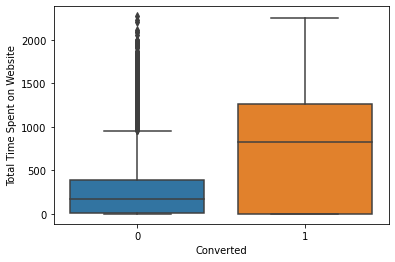

In [79]:
# Plotting Total Time Spent on Website vs Converted
sns.boxplot(x='Converted',y='Total Time Spent on Website', data=leads)
plt.show()

Inferences
- From the above boxplot we can clearly infer that converted leads has spend more time on website than non-converted leads.

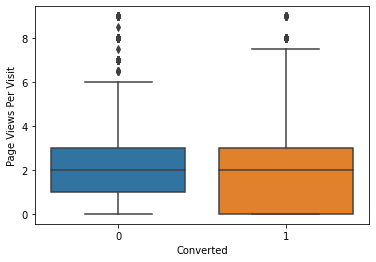

In [80]:
# Plotting Page Views Per Visit vs Converted
sns.boxplot(x='Converted',y='Page Views Per Visit',data=leads)
plt.show()

Inference-
- Median for converted leads and non-converted leads is almost the same. 

In [81]:
# Now Dropping the sales team generated variables cause we want our model to learn from the data generated from the leads 
# in order predict the leads that are more likely to turn into final customer
leads.drop(['Last Activity','Last Notable Activity','Tags'],axis=1,inplace=True)

In [82]:
# viewing the head of dataframe
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0,0,0.0,Not Specified,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674,2.5,Not Specified,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Business Administration,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2,1428,1.0,Not Specified,Unemployed,Mumbai,No


### Dummy variable Creation for all categorical columns

In [83]:

# getting list of all categorical columns from the data set
categorical=leads.select_dtypes(include=['object']).columns
categorical

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [84]:
# getting unique values of each column
leads.nunique()

Lead Number                               9090
Lead Origin                                  5
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1720
Page Views Per Visit                        66
Specialization                              11
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
dtype: int64

In [85]:
# for binary variables such as "Do Not Email" and "A free copy of Mastering The Interview" will map it yes and no to 
#1 and 0 respecively 
bin_col=['Do Not Email','A free copy of Mastering The Interview']
# defining the function
def Map(x):
    return x.map({'Yes':1,'No':0})
# applying the function
leads[bin_col]=leads[bin_col].apply(Map)

In [86]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0,0.0,Not Specified,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.5,Not Specified,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Not Specified,Unemployed,Mumbai,0


In [87]:
# creating dummy columns, dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
leads = pd.concat([leads,dummy],1)

# for specialization manually dropping one column
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

# for lead source manually dropping one column
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [88]:
#dropping the original columns after dummy variable creation
leads.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source'],axis=1,inplace=True)

In [89]:

leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,660737,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,5,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train-Test split & Logistic Regression Model Building

In [90]:

# importing the library
from sklearn.model_selection import train_test_split
# putting converted variable to y
y = leads['Converted']

# putting rest of the variables as X and dropping Lead Number as well
X=leads.drop(['Converted','Lead Number'],axis=1)


In [91]:
# splitting the data into train and test dataset 
# selecting the split of 70-30 for train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the Numerical Columns

In [92]:

# importing library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical=X_train.select_dtypes(include=['float64', 'int64','int32']).columns

X_train[numerical] = scaler.fit_transform(X_train[numerical])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
302,-0.289166,1.336782,-0.428736,0.044021,-0.659091,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6087,3.458217,-1.094877,-0.887355,-1.206716,-0.659091,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1033,-0.289166,0.642022,-0.025151,1.477269,-0.659091,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7656,3.458217,0.989402,-0.241619,2.014065,1.517242,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3241,-0.289166,0.294642,0.897591,-0.492776,1.517242,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Model Building using RFE and Stats Model

In [93]:
# importing library
import statsmodels.api as sm

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([False, False,  True, False, False, False,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True])

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 18),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 4),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 10),
 ('City_Other Cities of Maharashtra', False, 9),
 ('City_Other Metro Cities', False, 13),
 ('City_Thane & Outskirts', False, 11),
 ('City_Tier II Cities', False, 12),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization

In [97]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [98]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media'],
      dtype='object')

In [99]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2991.6
Date:                Tue, 10 Aug 2021   Deviance:                       5983.2
Time:                        21:54:19   Pearson chi2:                 7.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1649      0.629      0.262      0.793      -1.069       1.398
Total Time Spent on Website                              1.0832      0.037     28.888      0.000       1.010       1.157
Lead Origin_Lead Add Form                                2.7616      0.197     13.991      0.000       2.375       3.149
Lead Origin_Lead Import                                 -1.1606      0.526     -2.207      0.027      -2.191      -0.130
What is your current occupation_Housewife               21.9153   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Student                 -0.5630      0.659     -0.854      0.393      -1.855       0.729
What is your current occupation_Unemployed              -0.6537      0.625     -1.045      0.296      -1.879       0.572
What is your current occupation_Working Professional     2.0689      0.648      3.192      0.001       0.798       3.339
Specialization_Banking, Investment And Insurance         0.8528      0.175      4.861      0.000       0.509       1.197
Specialization_Business Administration                   0.3960      0.167      2.371      0.018       0.069       0.723
Specialization_E-Business                                0.6226      0.401      1.551      0.121      -0.164       1.409
Specialization_E-COMMERCE                                0.9429      0.291      3.244      0.001       0.373       1.513
Specialization_International Business                    0.6103      0.231      2.638      0.008       0.157       1.064
Specialization_Management Specializations                0.6001      0.083      7.199      0.000       0.437       0.764
Specialization_Media and Advertising                     0.6600      0.222      2.969      0.003       0.224       1.096
Specialization_Rural and Agribusiness                    0.5618      0.351      1.602      0.109      -0.126       1.249
Lead Source_Direct Traffic                              -1.4192      0.122    -11.673      0.000      -1.657      -1.181
Lead Source_Google                                      -0.8960      0.109     -8.218      0.000      -1.110      -0.682
Lead Source_Organic Search                              -1.0325      0.129     -8.030      0.000      -1.285      -0.781
Lead Source_Referral Sites                              -1.0778      0.319     -3.381      0.001      -1.703      -0.453
Lead Source_Welingak Website                             3.1227      1.022      3.054      0.002       1.119       5.127
========================================================================================================================
"""

p-value for column "What is your current occupation_Housewife" is very high so we can drop it 

In [100]:
# dropping column with high p-vale
col=col.drop('What is your current occupation_Housewife',1)

In [101]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.5
Date:                Tue, 10 Aug 2021   Deviance:                       5988.9
Time:                        21:54:19   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8590      0.549      1.565      0.118      -0.217       1.935
Total Time Spent on Website                              1.0824      0.037     28.883      0.000       1.009       1.156
Lead Origin_Lead Add Form                                2.7636      0.197     14.003      0.000       2.377       3.150
Lead Origin_Lead Import                                 -1.1592      0.526     -2.204      0.028      -2.190      -0.128
What is your current occupation_Student                 -1.2585      0.582     -2.161      0.031      -2.400      -0.117
What is your current occupation_Unemployed              -1.3497      0.543     -2.484      0.013      -2.415      -0.285
What is your current occupation_Working Professional     1.3724      0.569      2.410      0.016       0.256       2.488
Specialization_Banking, Investment And Insurance         0.8542      0.175      4.870      0.000       0.510       1.198
Specialization_Business Administration                   0.3993      0.167      2.395      0.017       0.072       0.726
Specialization_E-Business                                0.6243      0.401      1.555      0.120      -0.162       1.411
Specialization_E-COMMERCE                                0.9417      0.291      3.235      0.001       0.371       1.512
Specialization_International Business                    0.6117      0.231      2.645      0.008       0.158       1.065
Specialization_Management Specializations                0.6018      0.083      7.221      0.000       0.438       0.765
Specialization_Media and Advertising                     0.6716      0.221      3.034      0.002       0.238       1.105
Specialization_Rural and Agribusiness                    0.5632      0.351      1.606      0.108      -0.124       1.251
Lead Source_Direct Traffic                              -1.4200      0.122    -11.680      0.000      -1.658      -1.182
Lead Source_Google                                      -0.8946      0.109     -8.207      0.000      -1.108      -0.681
Lead Source_Organic Search                              -1.0298      0.128     -8.016      0.000      -1.282      -0.778
Lead Source_Referral Sites                              -1.0761      0.319     -3.376      0.001      -1.701      -0.451
Lead Source_Welingak Website                             3.1218      1.022      3.053      0.002       1.118       5.126
========================================================================================================================
"""

P-value for column "Specialization_E-Business" is high so we can drop it 

In [102]:
# dropping column with high p-vale
col=col.drop('Specialization_E-Business',1)

In [103]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.6
Date:                Tue, 10 Aug 2021   Deviance:                       5991.2
Time:                        21:54:19   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8608      0.549      1.569      0.117      -0.215       1.936
Total Time Spent on Website                              1.0832      0.037     28.904      0.000       1.010       1.157
Lead Origin_Lead Add Form                                2.7733      0.197     14.064      0.000       2.387       3.160
Lead Origin_Lead Import                                 -1.1584      0.526     -2.202      0.028      -2.189      -0.128
What is your current occupation_Student                 -1.2610      0.582     -2.166      0.030      -2.402      -0.120
What is your current occupation_Unemployed              -1.3479      0.543     -2.481      0.013      -2.413      -0.283
What is your current occupation_Working Professional     1.3733      0.569      2.412      0.016       0.257       2.489
Specialization_Banking, Investment And Insurance         0.8362      0.175      4.780      0.000       0.493       1.179
Specialization_Business Administration                   0.3813      0.166      2.293      0.022       0.055       0.707
Specialization_E-COMMERCE                                0.9223      0.291      3.172      0.002       0.352       1.492
Specialization_International Business                    0.5935      0.231      2.570      0.010       0.141       1.046
Specialization_Management Specializations                0.5839      0.082      7.081      0.000       0.422       0.745
Specialization_Media and Advertising                     0.6549      0.221      2.963      0.003       0.222       1.088
Specialization_Rural and Agribusiness                    0.5454      0.351      1.556      0.120      -0.142       1.232
Lead Source_Direct Traffic                              -1.4008      0.121    -11.594      0.000      -1.638      -1.164
Lead Source_Google                                      -0.8825      0.109     -8.125      0.000      -1.095      -0.670
Lead Source_Organic Search                              -1.0183      0.128     -7.945      0.000      -1.270      -0.767
Lead Source_Referral Sites                              -1.0749      0.319     -3.374      0.001      -1.699      -0.450
Lead Source_Welingak Website                             3.1104      1.022      3.042      0.002       1.106       5.114
========================================================================================================================
"""

P-value for column "Specialization_Rural and Agribusiness" is high so we can drop it

In [104]:
# dropping column with high p-vale
col=col.drop('Specialization_Rural and Agribusiness',1)

In [105]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2996.8
Date:                Tue, 10 Aug 2021   Deviance:                       5993.6
Time:                        21:54:20   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8634      0.548      1.574      0.115      -0.212       1.938
Total Time Spent on Website                              1.0849      0.037     28.958      0.000       1.011       1.158
Lead Origin_Lead Add Form                                2.7800      0.197     14.105      0.000       2.394       3.166
Lead Origin_Lead Import                                 -1.1591      0.526     -2.203      0.028      -2.190      -0.128
What is your current occupation_Student                 -1.2537      0.582     -2.154      0.031      -2.394      -0.113
What is your current occupation_Unemployed              -1.3453      0.543     -2.477      0.013      -2.410      -0.281
What is your current occupation_Working Professional     1.3785      0.569      2.423      0.015       0.263       2.494
Specialization_Banking, Investment And Insurance         0.8174      0.175      4.684      0.000       0.475       1.159
Specialization_Business Administration                   0.3623      0.166      2.185      0.029       0.037       0.687
Specialization_E-COMMERCE                                0.9024      0.291      3.106      0.002       0.333       1.472
Specialization_International Business                    0.5745      0.231      2.491      0.013       0.122       1.026
Specialization_Management Specializations                0.5652      0.081      6.935      0.000       0.405       0.725
Specialization_Media and Advertising                     0.6368      0.221      2.885      0.004       0.204       1.069
Lead Source_Direct Traffic                              -1.3835      0.120    -11.506      0.000      -1.619      -1.148
Lead Source_Google                                      -0.8728      0.108     -8.057      0.000      -1.085      -0.661
Lead Source_Organic Search                              -1.0024      0.128     -7.854      0.000      -1.253      -0.752
Lead Source_Referral Sites                              -1.0683      0.319     -3.351      0.001      -1.693      -0.443
Lead Source_Welingak Website                             3.1012      1.022      3.033      0.002       1.097       5.105
========================================================================================================================
"""

as we can see all the P-Values are less than 0.05 therefore checking the Variance Inflation Factor to see if there is any correlation between the variables

In [106]:
# Check for the VIF .
# importing the library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,5.39
12,Lead Source_Direct Traffic,3.48
13,Lead Source_Google,3.45
10,Specialization_Management Specializations,2.97
14,Lead Source_Organic Search,1.87
1,Lead Origin_Lead Add Form,1.86
5,What is your current occupation_Working Profes...,1.59
16,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.25
7,Specialization_Business Administration,1.20


The column 'What is your current occupation_Unemployed' has high VIF i.e. VIF>5 therefore dropping it  

In [108]:
#dropping variable with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

In [109]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.1
Date:                Tue, 10 Aug 2021   Deviance:                       6000.3
Time:                        21:54:21   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4805      0.078     -6.134      0.000      -0.634      -0.327
Total Time Spent on Website                              1.0858      0.037     28.995      0.000       1.012       1.159
Lead Origin_Lead Add Form                                2.7910      0.197     14.171      0.000       2.405       3.177
Lead Origin_Lead Import                                 -1.1621      0.526     -2.208      0.027      -2.194      -0.130
What is your current occupation_Student                  0.0868      0.214      0.406      0.685      -0.332       0.506
What is your current occupation_Working Professional     2.7159      0.179     15.175      0.000       2.365       3.067
Specialization_Banking, Investment And Insurance         0.8164      0.175      4.677      0.000       0.474       1.159
Specialization_Business Administration                   0.3789      0.165      2.290      0.022       0.055       0.703
Specialization_E-COMMERCE                                0.9092      0.289      3.142      0.002       0.342       1.476
Specialization_International Business                    0.5733      0.231      2.485      0.013       0.121       1.025
Specialization_Management Specializations                0.5714      0.081      7.013      0.000       0.412       0.731
Specialization_Media and Advertising                     0.6661      0.219      3.044      0.002       0.237       1.095
Lead Source_Direct Traffic                              -1.3845      0.120    -11.518      0.000      -1.620      -1.149
Lead Source_Google                                      -0.8748      0.108     -8.075      0.000      -1.087      -0.662
Lead Source_Organic Search                              -0.9987      0.128     -7.826      0.000      -1.249      -0.749
Lead Source_Referral Sites                              -1.0715      0.319     -3.360      0.001      -1.697      -0.446
Lead Source_Welingak Website                             3.0889      1.022      3.021      0.003       1.085       5.093
========================================================================================================================
"""

P-value for column "What is your current occupation_Student" is high so we can drop it

In [110]:
# dropping column with high p-vale
col=col.drop('What is your current occupation_Student',1)

In [111]:
#BUILDING MODEL #6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.2
Date:                Tue, 10 Aug 2021   Deviance:                       6000.5
Time:                        21:54:21   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4776      0.078     -6.123      0.000      -0.630      -0.325
Total Time Spent on Website                              1.0858      0.037     28.995      0.000       1.012       1.159
Lead Origin_Lead Add Form                                2.7911      0.197     14.172      0.000       2.405       3.177
Lead Origin_Lead Import                                 -1.1648      0.526     -2.213      0.027      -2.196      -0.133
What is your current occupation_Working Professional     2.7139      0.179     15.170      0.000       2.363       3.064
Specialization_Banking, Investment And Insurance         0.8176      0.174      4.686      0.000       0.476       1.160
Specialization_Business Administration                   0.3784      0.165      2.287      0.022       0.054       0.703
Specialization_E-COMMERCE                                0.9070      0.289      3.135      0.002       0.340       1.474
Specialization_International Business                    0.5717      0.231      2.478      0.013       0.120       1.024
Specialization_Management Specializations                0.5712      0.081      7.010      0.000       0.411       0.731
Specialization_Media and Advertising                     0.6650      0.219      3.039      0.002       0.236       1.094
Lead Source_Direct Traffic                              -1.3846      0.120    -11.518      0.000      -1.620      -1.149
Lead Source_Google                                      -0.8759      0.108     -8.088      0.000      -1.088      -0.664
Lead Source_Organic Search                              -1.0004      0.128     -7.844      0.000      -1.250      -0.750
Lead Source_Referral Sites                              -1.0744      0.319     -3.370      0.001      -1.699      -0.449
Lead Source_Welingak Website                             3.0870      1.022      3.020      0.003       1.083       5.091
========================================================================================================================
"""

as we can see all the P-Values are less than 0.05 therefore checking the Variance Inflation Factor to see if there is any correlation between the variables

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Management Specializations,2.90
10,Lead Source_Direct Traffic,2.19
11,Lead Source_Google,1.79
1,Lead Origin_Lead Add Form,1.57
14,Lead Source_Welingak Website,1.31
3,What is your current occupation_Working Profes...,1.22
12,Lead Source_Organic Search,1.22
5,Specialization_Business Administration,1.19
4,"Specialization_Banking, Investment And Insurance",1.15
0,Total Time Spent on Website,1.08


VIF for all variables is low which is good 

In [113]:
# deriving the Probabilities, Lead Score , Predictions on Train Data

# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.117381
6087    0.191375
1033    0.200878
7656    0.174603
3241    0.375395
5738    0.100763
7366    0.191375
3680    0.120935
4170    0.400354
43      0.213551
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11738143, 0.1913748 , 0.20087837, 0.17460336, 0.37539469,
       0.10076264, 0.1913748 , 0.1209347 , 0.40035366, 0.21355103])

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.117381,302
1,0,0.191375,6087
2,0,0.200878,1033
3,0,0.174603,7656
4,1,0.375395,3241


In [116]:
# take an arbitrary number as a probability cutoff which is 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.117381,302,0
1,0,0.191375,6087,0
2,0,0.200878,1033,0
3,0,0.174603,7656,0
4,1,0.375395,3241,0


In [117]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3459  476]
 [ 908 1520]]


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7824925349677825


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6260296540362438

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8790343074968234

In [122]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12096569250317663


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7615230460921844


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7920769406915502


### Plotting the ROC Curve

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

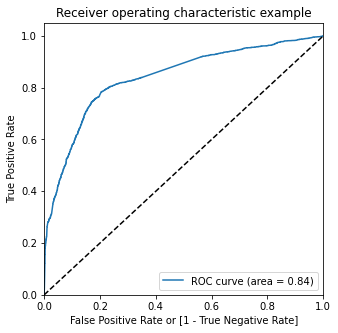

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117381,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.191375,6087,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200878,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.174603,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.375395,3241,0,1,1,1,1,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.427786  0.987232  0.082592
0.2   0.2  0.732830  0.833196  0.670902
0.3   0.3  0.790350  0.764003  0.806607
0.4   0.4  0.795694  0.704695  0.851842
0.5   0.5  0.782493  0.626030  0.879034
0.6   0.6  0.769291  0.535832  0.913342
0.7   0.7  0.750275  0.430807  0.947395
0.8   0.8  0.720886  0.308484  0.975349
0.9   0.9  0.692755  0.204283  0.994155


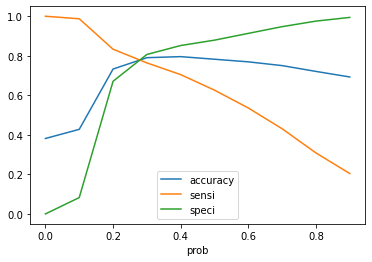

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [131]:
# From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.117381,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.191375,6087,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.200878,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.174603,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.375395,3241,0,1,1,1,1,0,0,0,0,0,0,1


In [132]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.117381,302,0,12
1,0,0.191375,6087,0,19
2,0,0.200878,1033,0,20
3,0,0.174603,7656,0,17
4,1,0.375395,3241,1,38


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7776206192047777

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2993,  942],
       [ 473, 1955]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8051894563426688

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.7606099110546378

Observation:
After running the model on the Train Data these are the figures we obtain:
- Accuracy: 77.76%
- Sensitivity: 80.51%
- Specificity: 76.06%


Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.


In [138]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.23939008894536212


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6748360372799448


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8635314483554529


In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2993,  942],
       [ 473, 1955]], dtype=int64)

In [142]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6748360372799448

In [143]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8051894563426688

In [144]:
# scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64','int32']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
6906,-0.293294,0.306196,1.891958,-0.154745,-0.685047,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1873,-0.293294,-0.386173,-0.542475,-0.154745,-0.685047,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
771,-0.293294,1.344750,-0.790628,2.446282,-0.685047,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4495,-0.293294,0.306196,-0.618551,0.885666,1.459755,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9061,-0.293294,-0.386173,2.359282,-0.154745,1.459755,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [145]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website
6906,1.891958,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1873,-0.542475,0,0,0,0,0,0,0,0,0,0,1,0,0,0
771,-0.790628,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4495,-0.618551,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9061,2.359282,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test)

#### PREDICTIONS ON TEST SET

In [147]:
y_test_pred = res.predict(X_test_sm)

In [148]:
y_test_pred[:10]

6906    0.682087
1873    0.125368
771     0.098678
4495    0.189389
9061    0.780883
4929    0.612950
2308    0.232875
1034    0.092722
9033    0.161284
7008    0.712377
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head
y_pred_1.head()

,0
6906,0.682087
1873,0.125368
771,0.098678
4495,0.189389
9061,0.780883


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [152]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [153]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.682087
1,0,1873,0.125368
2,0,771,0.098678
3,0,4495,0.189389
4,1,9061,0.780883


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [157]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,6906,0.682087
1,0,1873,0.125368
2,0,771,0.098678
3,0,4495,0.189389
4,1,9061,0.780883


In [158]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [159]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6906,1,0.682087,68
1,1873,0,0.125368,13
2,771,0,0.098678,10
3,4495,0,0.189389,19
4,9061,1,0.780883,78


In [160]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [161]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,6906,1,0.682087,68,1
1,1873,0,0.125368,13,0
2,771,0,0.098678,10,0
3,4495,0,0.189389,19,0
4,9061,1,0.780883,78,1


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7766776677667767

In [163]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1270,  390],
       [ 219,  848]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7947516401124649

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.7650602409638554

In [167]:
# Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6849757673667205

In [168]:
# Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7947516401124649

Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy: 77.66%
- Sensitivity: 79.47%
- Specificity: 76.50%

Final Observation:

Train Data:
- Accuracy: 77.76%
- Sensitivity: 80.51%
- Specificity: 76.06%

Test Data:
- Accuracy: 77.66%
- Sensitivity: 79.47%
- Specificity: 76.50%